The [reverse probability page](first_bayes) has a game, that we analyzed by
simulation, and then by reflection.

The game is:

* I have two boxes; *BOX4* with 4 red balls and 1 green ball, and *BOX2* with
  two red balls and three green balls.
* I offer you one of these two boxes at random, but with a 30% chance of
  getting BOX4 and a 70% chance of getting BOX2.
* You draw a ball at random from the box, and you get a red ball.
* What is the probability that I gave you BOX4?

We found by simulation, and later by reflection, that the probability is around
0.462.

The logic we discovered was:

* We want the proportion of "red" trials that came from BOX4.
* Calculate the proportion of trials that are *both* BOX4 and red, and divide
  by the overall proportion of red trials.
* The proportion of red trials that are *both* BOX4 *and* red is the
  proportion of BOX4 trials multiplied by (the proportion of BOX4 trials that
  are red).


## Bayes calculation in bars

This is another way to express that logic, using the height of bars to express
the probabilities.

First we express the initial probabilities of getting BOX4 and BOX2:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

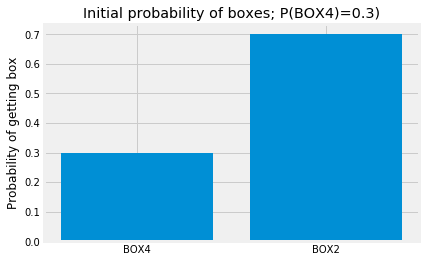

In [2]:
box_probabilities = np.array([0.3, 0.7])
x_locations = [0, 1]
box_labels = ['BOX4', 'BOX2']
plt.bar(x_locations, box_probabilities)
plt.xticks(x_locations, box_labels)
plt.ylabel("Probability of getting box")
plt.title('Initial probability of boxes; P(BOX4)=0.3)');

Next we express the initial probabilities of getting a red ball from BOX4 and
from BOX2:

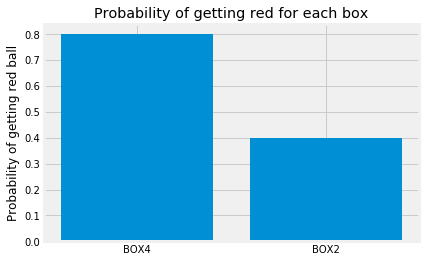

In [3]:
red_probabilities = np.array([0.8, 0.4])
plt.bar(x_locations, red_probabilities)
plt.xticks(x_locations, box_labels)
plt.ylabel("Probability of getting red ball")
plt.title('Probability of getting red for each box');

Next we combine the two steps, of getting a box, and then drawing a ball.

There is a 0.3 probability of BOX4 and a 0.7 probability of a red ball, given
we have BOX4, so the probability of BOX4 *and* a red ball is 0.3 (for BOX4) *
0.8 (for red given BOX4) = 0.24.

Similarly, the probability of BOX2 *and* a red ball is 0.7 (for BOX2) * 0.4
(for red given BOX2) = 0.28.

We can think of this as multiplying the values expressed by heights in the
first bar graph (0.3, and 0.7 in this case), by the values expressed by heights
in the second bar graph (0.8 and 0.4 in this case).

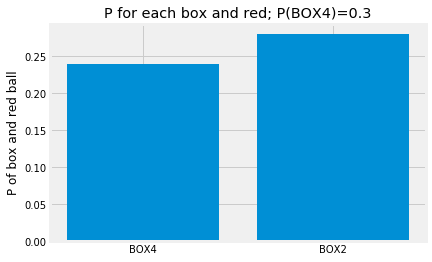

In [4]:
box_and_red_probs = box_probabilities * red_probabilities
plt.bar(x_locations, box_and_red_probs)
plt.xticks(x_locations, box_labels)
plt.ylabel("P of box and red ball")
plt.title('P for each box and red; P(BOX4)=0.3');

Lastly, remember we are interested in the probability that we started with
BOX4, given we have a red ball.

To get this probability, we first take the probability of getting a red ball
*and* BOX4.  This is the first bar on the graph above - 0.3 * 0.8 = 0.24.

Next we divide by the overall probability of getting a red ball, which is the
*sum of the heights of the two bars* above - 0.24 + 0.28 = 0.52.

We can do this calculation by dividing the heights of the bars above by the sum
of the heights, so the heights of the bars now sum to 1.

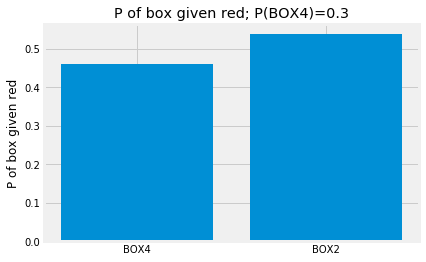

In [5]:
box_given_red_probs = box_and_red_probs / np.sum(box_and_red_probs)
plt.bar(x_locations, box_given_red_probs)
plt.xticks(x_locations, box_labels)
plt.ylabel('P of box given red')
plt.title('P of box given red; P(BOX4)=0.3');

The left bar is our familiar (0.24 * 0.8) / 0.52 = 0.462 value, from the
[reverse probability page](first_bayes).  It is the probability that we were
given BOX4, given that we have drawn a red ball.  The second bar is the
probability that we were given BOX2, given we have drawn a red ball.  Note that
the height of the bars sums to 1.

## Equal chances in bars

Now imagine a slight change to the game; say there is an equal (50%) chance of
getting BOX4 or BOX2:

In [6]:
box_probabilities = np.array([0.5, 0.5])

Show the new probabilities:

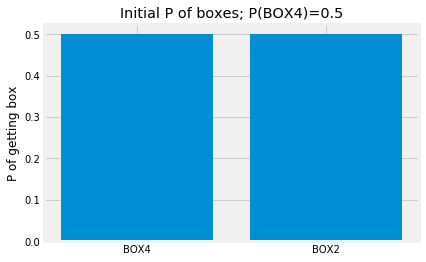

In [7]:
plt.bar(x_locations, box_probabilities)
plt.xticks(x_locations, box_labels)
plt.ylabel('P of getting box')
plt.title('Initial P of boxes; P(BOX4)=0.5');

The probabilities of getting red from each box have not changed:

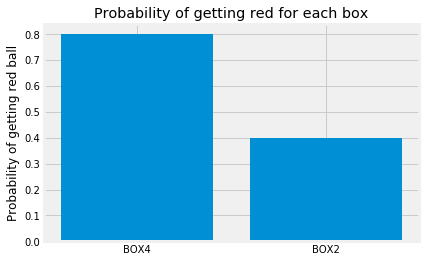

In [8]:
plt.bar(x_locations, red_probabilities)
plt.xticks(x_locations, box_labels)
plt.ylabel("Probability of getting red ball")
plt.title('Probability of getting red for each box');

We scale the red-ball bars by the probabilities of the boxes:

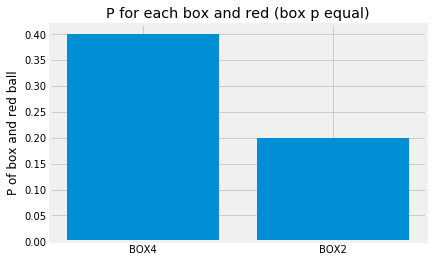

In [9]:
box_and_red_probs = box_probabilities * red_probabilities
plt.bar(x_locations, box_and_red_probs)
plt.xticks(x_locations, box_labels)
plt.ylabel("P of box and red ball")
plt.title('P for each box and red (box p equal)');

Last we divide by the sum of the heights of the bars:

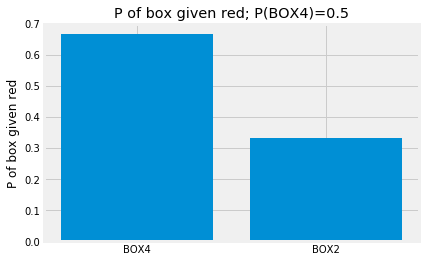

In [10]:
box_given_red_probs = box_and_red_probs / np.sum(box_and_red_probs)
plt.bar(x_locations, box_given_red_probs)
plt.xticks(x_locations, box_labels)
plt.ylabel('P of box given red')
plt.title('P of box given red; P(BOX4)=0.5');

Because the probability that we got BOX4 increased, the probability that we got
BOX4, given we drew a red ball, has also increased.  That probability is now:

In [11]:
print('P(BOX4 | red)', box_given_red_probs[0])

P(BOX4 | red) 0.6666666666666666


Remember our steps:

1. Get the probability of red given each box --- here: (0.8, 0.4);
2. Scale these by the probability of each box --- here: (0.5, 0.5);
3. Divide the results by the sum of the heights to get the reverse
   probabilities --- here (0.67, 0.34).

In [12]:
# Step 1 - P of reds.
red_probabilities = np.array([0.8, 0.4])
# Step 2 - scale by P of the boxes
box_probabilities = np.array([0.5, 0.5])
box_and_red_probs = box_probabilities * red_probabilities
# Step 3 - divide each bar by sum of bar heights.
box_given_red_probs = box_and_red_probs / np.sum(box_and_red_probs)
# Show result
box_given_red_probs

array([0.66666667, 0.33333333])

Notice also, in this case, where the probability of each box is the same, we
can miss out step 2.  This is because, when the probability of each box is the
same, scaling the probability does not change the heights of the bars relative
to each other, so, when we divide each bar by the sum of the bar heights, the
result is the same.

In [13]:
# When box probabilities are equal, we can miss out step 2.
# Step 1 - P of reds.
red_probabilities = np.array([0.8, 0.4])
# Step 3 - divide each bar by sum of bar heights.
shortcut_box_given_red_probs = red_probabilities / np.sum(red_probabilities)
# Show result is the same as with step 2.
shortcut_box_given_red_probs

array([0.66666667, 0.33333333])

If you do not mind a little basic algebra, see why this must be true in the
[equal initial p]({{ site.baseurl }}/chapters/10/equal_initial_p) page.